In [30]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load data
df = pd.read_csv('retail_churn_200.csv')

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert object columns to category (required for native categorical support)
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

# Train-test split (stratify recommended for classification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Simple XGBoost Model (no OHE)
model = XGBClassifier(
    tree_method='hist',
    enable_categorical=True,   # <--- Key line (no one-hot needed)
    n_estimators=100,
    learning_rate=0.6,
    max_depth=5,
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")


XGBoost Accuracy: 0.9250


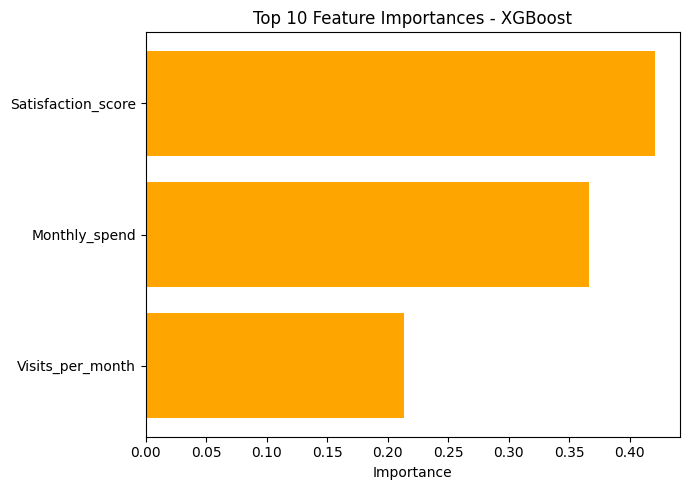

In [33]:

import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

idx = np.argsort(importances)[::-1]

plt.figure(figsize=(7,5))
plt.barh(features[idx][:10][::-1], importances[idx][:10][::-1], color='orange')
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


<Figure size 500x400 with 0 Axes>

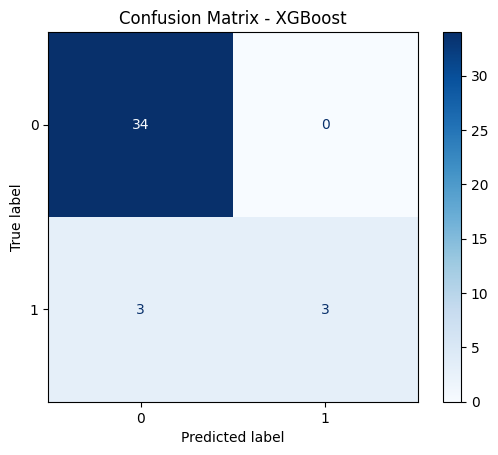

In [35]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
plt.figure(figsize=(5,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()
